Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# EKONOMIJA
## 24.03.2020. 

#Filip Rinkovec

***

<font color='red'>
Preimenovati svesku: File/Rename u __ekonomija_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb)</font>

***

#### __Zadatak 1__: Dinamički model
Za malu porodičnu piceriju funkcije ponude i potražnje su linearne funkcije cene: $Q_d(P) = A - BP$ i $Q_s(P) = -C + DP$, gde je $A = 22$ pice po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 7$ pica po danu po evru.

a) Formirati Python skriptu koja prema algoritmu sa slajdova, za definisane funkcije ponude i potražnje pronalazi stacionarno stanje $P_{eq}$. Na istom grafiku nacrtati funkcije $Q_d(P)$ i  $Q_s(P)$. Označiti ose grafika. 

3.0000000000000004


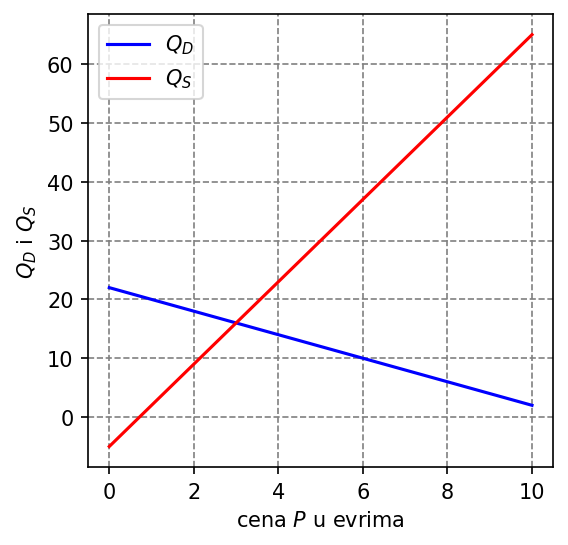

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import integrate
import scipy

QD = lambda P,A,B: A - B*P
QS = lambda P,C,D: -C + D*P

funk = lambda P,A,B,C,D: QD(P,A,B) - QS(P,C,D)
P=np.linspace(0,10,2000)
A,B,C,D = 22,2,5,7

plt.figure(figsize=(4,4),dpi=150)
plt.plot(P,QD(P,A,B),"b-",label="$Q_{D}$")
plt.plot(P,QS(P,C,D),"r-",label="$Q_{S}$")
plt.legend()
plt.xlabel("cena $P$ u evrima")
plt.ylabel("$Q_{D}$ i $Q_{S}$")
plt.grid(b=True, which='both', color='grey',linestyle='--')

znak = np.sign(funk(P,A,B,C,D))
razlike = np.diff(znak)
nule = np.where(razlike != 0)[0]
Peq=[scipy.optimize.newton(funk,P[nule[ink]],args = (A,B,C,D)) for ink in range(len(nule))]
for ink in range(len(Peq)):
     print(Peq[ink])




b) Formirati Python definiciju (<font color='blue'>dinamicki_model</font>) koja predstavlja odgovarajuću diferencijalnu jednačinu kojom je opisana dinamika cene. Dinamika cene opisana je trenutnom razlikom između funkcije ponude i potražnje kao:

<br>
\begin{equation}
    \frac{dP(t)}{dt} = \gamma(Q_d(P) - Q_s(P)) = -\gamma(B + D)P(t) + \gamma(A + C)
\end{equation}
<br>

gde je faktor korelacije $\gamma = 0.1$ u odgovarajućim jedinicama. 
Koeficijenti $A$, $B$, $C$, $D$ i $\gamma$ treba da budu pozivni parametri definicije koja predstavlja diferencijalnu jednačinu.

In [0]:
gama = 0.1
def dinamicki_model(P, t, gama, A, B, C, D):
    return gama*(C+A)-gama*(B+D)*P

c) Formirati Python skriptu koja rešava diferencijalnu jednačinu i iscrtava njena rešenja. Na istom grafiku prikazati dinamiku cene za tri moguća slučaja: početna cena $P(0)$ jednaka je ravnotežnoj ceni ($P(0) = P_{eq}$), početna cena je veća od ravnotežne ($P(0) = 2P_{eq}$) i početna cena je manja od ravnotežne cene ($P(0) = 0.5P_{eq}$). Za definisane parametre i početne uslove, rešavati diferencijalnu jednačinu na vremenskom domenu od $0$ do $10$ dana u $1000$ ekvidistantnih tačaka. Na istom grafiku, različitim bojama (plavom, crvenom i zelenom), nacrtati profile $P(t)$ za sva tri slučaja početnih uslova. Označiti ose grafika i ubaciti legendu.

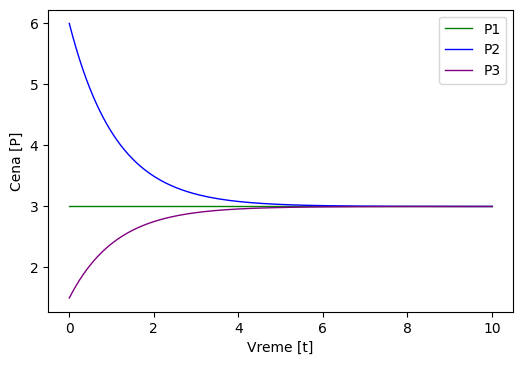

In [28]:
t = np.linspace(0,10,1000)

P0 = [Peq[0], 2*Peq[0], 0.5*Peq[0]]

Pt1 = [integrate.odeint(dinamicki_model, P0[i], t, args=(gama,A,B,C,D)) for i in range(len(P0))]
cc=["green","blue","purple"]
plt.figure(2,dpi=100)
plt.plot(t,Pt1[0],color=cc[0],linewidth=1.0,linestyle="-", label="P1")
plt.plot(t,Pt1[1],color=cc[1],linewidth=1.0,linestyle="-", label="P2")
plt.plot(t,Pt1[2],color=cc[2],linewidth=1.0,linestyle="-", label="P3")
plt.xlabel('Vreme [t]')
plt.ylabel('Cena [P]')
plt.legend()
plt.show()

d) Da li sistem ima stabilnu dinamiku? Šta se dešava sa cenom posle dovoljno dugog vremena? Da li se dostiže predviđeno stacionarno stanje? 

U prvom slučaju je on stabilan na samom početku i nema promene cene po vremenu, dok se u druga dva stabilizuju posle priblizno jednakih vremenskih intervala.

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 2__: Model sa očekivanjima cena

a) Na primeru porodične picerije sa slajdova primeniti kompleksniji model koji uključuje modelovanje očekivanja cene od strane potraživača. U takvom modelu funkcija potražnje $Q_d$ zavisi i od promene cene, kao i od brzine njene promene:

<br>
\begin{equation}
    Q_d = A - BP + M\frac{dP}{dt} + N\frac{d^2P}{dt^2},\\
    Q_s = -C + DP.
\end{equation}
<br>

Diferencijalna jednačina koja opisuje promenu cene proizvoda u ovakvom modelu i koju treba rešavati dobija se izjednačavanjem $Q_d = Q_s$ i ima formu:

<br>
\begin{equation}
    \frac{d^2P}{dt} + \frac{M}{N}\frac{dP}{dt} - \frac{B+D}{N}P = -\frac{A+C}{N}.
\end{equation}
<br>


Formirati Python definiciju (<font color='blue'>ocekivanja_cene</font>) koja predstavlja odgovarajuću diferencijalnu jednačinu kojom je opisana dinamika cene. Koeficijenti $A$, $B$, $C$, $D$, $M$ i $N$ treba da budu pozivni parametri definicije koja predstavlja diferencijalnu jednačinu.

In [0]:
def ocekivanja_cene(y,t,A,B,C,D,M,N):
    y1,y2=y
    return [y2, -(A+C)/N + (B+D)/N*y1 - M/N*y2]

b) Ispitati i diskutovati dinamiku sistema za slučaj sledećih parametara:
<ol>
<li>$A = 42$ pice po danu, $B = 4$ pice po danu po evru, $C = 6$ pica po danu, $D = 8$ pica po danu po evru, $M = –4$ pice po evru, $N = 1$ (u odgovarajućim jedinicama), $P(0) = 6$ evra, $dP/dt(0) = 4$ evra po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li> 
<br>    
    
<li>$A = 40$ pica po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 3$ pice po danu po evru, $M = –2$ pice po evru, $N = –1$ (u odgovarajućim jedinicama), $P(0) = 12$ evra, $dP/dt(0) = 1$ evro po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li>
<br> 

<li>$A = 40$ pica po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 3$ pice po danu po evru, $M = 0.5$ pice po evru, $N = –1$ (u odgovarajućim jedinicama), $P(0) = 12$ evra, $dP/dt(0) = 1$ evro po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li>
</ol>
Za svaki od tri slučaja na jednom subplot-u nacrtati i vremenski ($P$ u funkciji od $t$) i fazni dijagram ($dP/dt$ u funkciji od $P$) dinamike cene.  

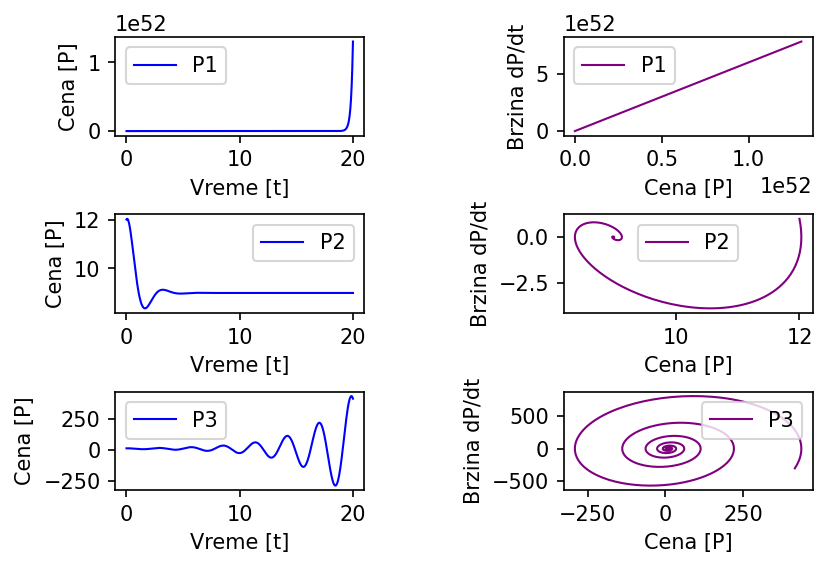

In [29]:
A,B,C,D,M,N=[42,40,40],[4,2,2],[6,5,5],[8,3,3],[-4,-2,0.5],[1,-1,-1]
uslov=[[6,4],[12,1],[12,1]]

t=np.linspace(0,20,1000)

plt.figure(5,dpi=150)

for i in range(3):
    Pt = integrate.odeint(ocekivanja_cene, uslov[i], t, args=(A[i],B[i],C[i],D[i],M[i],N[i]))
    
    plt.subplot(3,2,i+i+1)
    plt.plot(t,Pt[:,0],color="blue",linewidth=1.0,linestyle="-", label="P"+str(i+1))
    plt.subplots_adjust(hspace = .8, wspace = .8)
    plt.xlabel('Vreme [t]')
    plt.ylabel('Cena [P]')
    plt.legend()
                       
    plt.subplot(3,2,i+i+2)
    plt.plot(Pt[:,0],Pt[:,1],color="purple",linewidth=1.0,linestyle="-", label="P"+str(i+1))
    plt.subplots_adjust(hspace = .8, wspace = .8)
    plt.xlabel('Cena [P]')
    plt.ylabel('Brzina dP/dt')
    plt.legend()
                       
plt.show()

c) Na osnovu analize stabilnosti sa slajdova, komentarisati očekivane rezultate dinamike sa dobijenim graficima. 
U kom slučaju je dinamika stabilna, u kom nestabilna i zašto? 
Komentarisati fazne dijagrame. Kojoj vrsti oscilacija odgovara ovakav model? 
Šta bi, prema analogiji sa fizikom, bio najbolji mogući slučaj za dinamiku cene? Predložiti neke vrednosti za parametre $B$, $D$, $M$ i $N$ tako da dinamike cene bude optimalna. Nacrtati grafik takve dinamike cene.

In [24]:
"""U prvom i trecem slucaju cena je u pocetku u stabilnom stanju. U prvom onda je naglo izbacena iz njega i takva pojava nema analogiju sa oscilatornim kretanjem. 
U trecem dolazi do sve vecih nestabilnosti, ali model odgovara prinudnim oscilacijama.
U drugom slucaju iz nestabilnog stanja dinamike sistem dolazi u stanje stabilne dinamike. Analogija sa kriticno prigusenim oscilacijama."""

'U prvom i trecem slucaju cena je u pocetku u stabilnom stanju. U prvom onda je naglo izbacena iz njega i takva pojava nema analogiju sa oscilatornim kretanjem. \nU trecem dolazi do sve vecih nestabilnosti, ali model odgovara prinudnim oscilacijama.\nU drugom slucaju iz nestabilnog stanja dinamike sistem dolazi u stanje stabilne dinamike. Analogija sa kriticno prigusenim oscilacijama.'

ERROR! Session/line number was not unique in database. History logging moved to new session 60
